In [47]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import string
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from pathlib import Path  
import glob
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

#from IPython.display import display


from collections import Counter

from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
import math

In [4]:
def clean_data(filename):

    # load data
    file = open(f"./data/{filename}.txt","r+")
    text = file.read()
    file.close()
    
    # split into words
    tokens = word_tokenize(text)
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    punct = [w.translate(table) for w in tokens]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    sw = [w for w in punct if not w in stop_words]
    
    # remove remaining tokens that are not alphabetic
    alpha = [word for word in sw if word.isalpha()]

    # convert to lower case
    lower = [w.lower() for w in alpha ]

    
    
    # determine tags
    tags = pos_tag(lower)
    tg = [t for t in tags]

    filtertg = [w for w,t in tg
              if t == "NN"
              or t == "NNS"
              or t == "NNP"
              or t == "NNPS"
              or t == "FW"]
    
    #lemmatize
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in filtertg if len(word)>3]
    
    
    #snowball_stemmer_obj = SnowballStemmer("english")
    #stemm = [snowball_stemmer_obj.stem(word) for word in filtertg]
    
    results = [word for word in lem
        if word !='project' 
        and word !='gutenbergtm'
        and word !='gutenberg'
        and word !='ebook'
        and word !='chapter'
        and word !='work'
        and word !='nothing'
        and word !='thing'
        and word !='anything'
        and word !='something'
        and word !='time'
        and word !='sidenote']
    
    return results
    
    
    
    

In [5]:
def word_cloud(book):
    clean =  clean_data(book)
    
    unique_string=(" ").join(clean)
    wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("your_file_name"+".png", bbox_inches='tight')
    plt.show()
    plt.close()

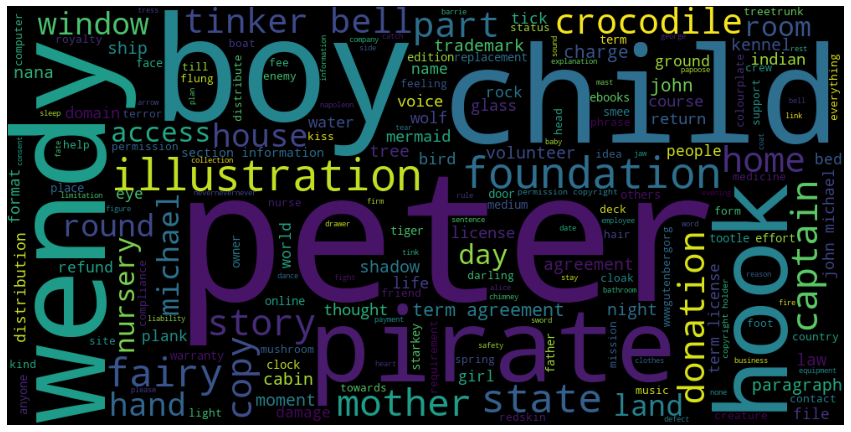

In [6]:
cloud = word_cloud('Peter-pan')

In [7]:
def cleantxt(): 

    text_files = glob.glob("/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada/data/*.txt")
    text_titles = [Path(text).stem for text in text_files]
    for title in text_titles:
        cleaned = clean_data(title)
        with open(f"{title}.txt",'w',encoding='utf-8') as F:
            for s in cleaned:
                F.write("%s\n" % s)


In [8]:
#a = cleantxt()

In [9]:
directory_path ="/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada/"
text_files = glob.glob(f"{directory_path}/*.txt")
text_files = glob.glob("/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada/*.txt")
text_titles = [Path(text).stem for text in text_files]

In [10]:
vect = TfidfVectorizer(input='filename',min_df = 2, max_df = 0.6
                       
                       , stop_words='english')
vect_text = vect.fit_transform(text_files)
df = pd.DataFrame(vect_text.toarray(), index=text_titles, columns=vect.get_feature_names()).T
df      

,History of Phosphorus,Mother Storie,Little Lord Fauntleroy,alice-in-wonderland,The History of England from the Accession of James II,The Secret Garden,The History Of The Decline And Fall Of The Roman Empire,Histories of two hundred and fifty-one divisions of the German army which participated in the wa,The Last Leaf,The Chemistry of Cookery,...,The Railway Children,Among the Forest People,History of King Charles The First of England,The French Revolution,The Greater Republic,The Magic of Oz,How the Flag Became Old Glory,The Gases of the Atmosphere The History of Their Discovery by William Ramsay,The Princess and the Goblin,The Magic Fishbone
aaron,0.006948,0.0,0.000000,0.0,0.0,0.000000,0.000352,0.0,0.004712,0.0,...,0.0,0.0,0.0,0.002993,0.007963,0.0,0.0,0.0,0.0,0.0
aback,0.000000,0.0,0.003216,0.0,0.0,0.004235,0.000000,0.0,0.006551,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
abandon,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.001448,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.002344,0.003507,0.0,0.0,0.0,0.0,0.0
abandonment,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000245,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
abate,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000989,0.0,0.005291,0.0,...,0.0,0.0,0.0,0.004482,0.001118,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
étranger,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.001498,0.000000,0.0,0.0,0.0,0.0,0.0
êtes,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.004494,0.000000,0.0,0.0,0.0,0.0,0.0
être,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000245,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.009711,0.000000,0.0,0.0,0.0,0.0,0.0
über,0.008573,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.005814,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [11]:

lsa_model = TruncatedSVD(n_components=3, n_iter=2, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text).T

In [12]:
explained_variance = lsa_model.explained_variance_ratio_.sum()
print("Sum of explained variance ratio: %d%%" % (int(explained_variance * 100)))

Sum of explained variance ratio: 12%


In [13]:
df = pd.DataFrame(
lsa_top,
index=['Topic 1', 'Topic 2', 'Topic 3'],
columns=[text_titles]).T
df

,Topic 1,Topic 2,Topic 3
History of Phosphorus,0.151024,0.541586,-0.090759
Mother Storie,0.204614,0.011492,0.515233
Little Lord Fauntleroy,0.088707,0.025347,0.110068
alice-in-wonderland,0.048676,0.020754,0.339004
The History of England from the Accession of James II,0.608304,-0.122920,-0.045158
The Secret Garden,0.125254,-0.000116,0.243123
The History Of The Decline And Fall Of The Roman Empire,0.551241,-0.106887,-0.014827
Histories of two hundred and fifty-one divisions of the German army which participated in the wa,0.120600,-0.026370,0.011766
The Last Leaf,0.494228,-0.059044,0.080908
The Chemistry of Cookery,0.243962,0.601625,-0.013953


In [68]:
s = df.idxmax(axis=1)
df2 = pd.DataFrame(s)
df2.reset_index(inplace=True)
a = df2.groupby(by=0).agg(list)
print(a.to_string())


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           level_0
0                                                                                                                                                                                    

In [42]:
terms = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    terms_comp = zip(terms, comp)
    sorted_words = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i+1)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 1: 
nation congress president union constitution army officer authority colony parliament 

Topic 2: 
acid solution temperature substance soap phlogiston cent meat tube phosphorus 

Topic 3: 
alice fairy goblin princess peter lady queen baby rabbit girl 



def best_recommended_books(filename):
    cleaned = clean_data(filename)
    with open(f"{filename}.txt",'w',encoding='utf-8') as F:
        for s in cleaned:
            F.write("%s\n" % s)
    text_files = glob.glob(f"/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada/{filename}.txt")
    vect = TfidfVectorizer(input='content')
    vect_text = vect.fit_transform(text_files)
    print(vect_text)
    


In [43]:
def best_recommended_books(book1,book2):
    c1 = clean_data(book1)
    c2 = clean_data(book2)
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

    print(counter_cosine_similarity(counterA, counterB) * 100)

In [132]:
a = best_recommended_books('Peter-Pan','War and Peace')

AttributeError: 'list' object has no attribute 'get'